In [ ]:
!pip install pyspark boto


In [ ]:
import boto3

aws_access_key_id = '########'
aws_secret_access_key = '########'

# Create a session using your credentials
session = boto3.Session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)

# Create S3 resource from the session
s3 = session.resource('s3')

# Access the bucket
bucket = s3.Bucket('spamemail')

# List objects in the bucket
for obj in bucket.objects.all():
    print(obj.key)


spambase.data


In [ ]:
from io import StringIO

# Set up the S3 client
s3 = boto3.client('s3', aws_access_key_id='########', aws_secret_access_key='########')

# Specify the bucket and file key
bucket_name = 'spamemail'
file_key = 'spambase.data'

# Get the object from the bucket using the client
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
data = obj['Body'].read().decode('utf-8')

# Load the data into a pandas DataFrame, assuming comma as delimiter
df_1 = pd.read_csv(StringIO(data), delimiter=',', names=[f"feature_{i}" for i in range(57)] + ["label"])

# Convert Pandas DataFrame to Spark DataFrame

print(df.head())

Row(feature_0=0.0, feature_1=0.64, feature_2=0.64, feature_3=0.0, feature_4=0.32, feature_5=0.0, feature_6=0.0, feature_7=0.0, feature_8=0.0, feature_9=0.0, feature_10=0.0, feature_11=0.64, feature_12=0.0, feature_13=0.0, feature_14=0.0, feature_15=0.32, feature_16=0.0, feature_17=1.29, feature_18=1.93, feature_19=0.0, feature_20=0.96, feature_21=0.0, feature_22=0.0, feature_23=0.0, feature_24=0.0, feature_25=0.0, feature_26=0.0, feature_27=0.0, feature_28=0.0, feature_29=0.0, feature_30=0.0, feature_31=0.0, feature_32=0.0, feature_33=0.0, feature_34=0.0, feature_35=0.0, feature_36=0.0, feature_37=0.0, feature_38=0.0, feature_39=0.0, feature_40=0.0, feature_41=0.0, feature_42=0.0, feature_43=0.0, feature_44=0.0, feature_45=0.0, feature_46=0.0, feature_47=0.0, feature_48=0.0, feature_49=0.0, feature_50=0.0, feature_51=0.778, feature_52=0.0, feature_53=0.0, feature_54=3.756, feature_55=61, feature_56=278, label=1)


In [ ]:
print(df.columns)

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'label']


In [ ]:
!pip install pyspark

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline


In [ ]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder \
    .master("local") \
    .appName("SpamBayes") \
    .getOrCreate()


In [ ]:
schema = StructType([
    *([StructField(f"feature_{i}", DoubleType(), True) for i in range(57)]) +
    [StructField("label", IntegerType(), True)]
])

# Load the dataset
# df = spark.read.csv("/spambase.data", schema=schema, header=False)

df = spark.createDataFrame(df_1)
df.show(5)

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----+
|feature_0|feature_1|feature_2|feature_3|feature_4|feature_5|feature_6|feature_7|feature_8|feature_9|feature_10|feature_11|feature_12|feature_13|feature_14|feature_15|feature_16|feature_17|feature_18|feature_19|feature_20|feature_21|feature_22|feature_23|feature_24|feature_25|feature_26|feature_27|feature_28|feature_29|feature_30|feature_31|feature_32|feature_33|feature_34

In [ ]:
assembler = VectorAssembler(inputCols=[f"feature_{i}" for i in range(57)], outputCol="features_vector")

In [ ]:
# Scale features
scaler = StandardScaler(inputCol="features_vector", outputCol="features", withStd=True, withMean=False)


In [ ]:
# Split the data into training and test sets (70% training, 30% test)
train_data, test_data = df.randomSplit([0.70, 0.3], seed=42)
from pyspark.sql.functions import rand
train_data.orderBy(rand()).show(10)


+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----+
|feature_0|feature_1|feature_2|feature_3|feature_4|feature_5|feature_6|feature_7|feature_8|feature_9|feature_10|feature_11|feature_12|feature_13|feature_14|feature_15|feature_16|feature_17|feature_18|feature_19|feature_20|feature_21|feature_22|feature_23|feature_24|feature_25|feature_26|feature_27|feature_28|feature_29|feature_30|feature_31|feature_32|feature_33|feature_34

In [ ]:

from pyspark.sql.functions import col, when, log, count, mean, stddev

# Step 1: Prepare the data
# Assuming df is already loaded and features are assembled into a feature vector column named "features"

# Calculate priors
class_counts = train_data.groupBy('label').count().collect()
total_count = train_data.count()
priors = {row['label']: row['count'] / total_count for row in class_counts}

# Step 2: Calculate means and variances for each feature per class
feature_stats = {}
num_features = 57


In [ ]:
num_features = 57  # Total number of features
feature_stats = {}

for label in priors.keys():
    stats = []
    for i in range(num_features):
        # Note: Use the correct column names directly, which are 'feature_i' for each i
        mean_col = mean(col(f'feature_{i}'))  # Calculate mean for feature_i
        stddev_col = stddev(col(f'feature_{i}'))  # Calculate stddev for feature_i
        # Filter rows by label, and calculate mean and stddev for the feature_i
        group_stats = train_data.filter(col('label') == label).select(mean_col, stddev_col).first()
        stats.append((group_stats[0], group_stats[1]))  # Append the results as a tuple
    feature_stats[label] = stats  # Store the stats for each label





In [ ]:
from pyspark.sql import Row
# Step 3: Define a function to predict a single example
def predict(features):
    log_probs = {}
    for label, class_prior in priors.items():
        log_prob = np.log(class_prior)  # Start with the log of the prior
        for i, feature in enumerate(features):
            mean, std = feature_stats[label][i]
            if std > 0:  # Check to avoid division by zero
                # Apply Gaussian probability density function
                log_prob -= 0.5 * np.log(2 * np.pi * std ** 2)
                log_prob -= ((feature - mean) ** 2) / (2 * std ** 2)
        log_probs[label] = log_prob
    return max(log_probs, key=log_probs.get)

def predict_features(row):
    # Extract features from the row assuming individual columns 'feature_0' to 'feature_56'
    features = [row[f'feature_{i}'] for i in range(57)]
    prediction = predict(features)
    return Row(label=row['label'], prediction=prediction)

# Apply the model to the test data
test_data_with_predictions = test_data.rdd.map(predict_features).toDF()

# Step 5: Evaluate the model
correct_predictions = test_data_with_predictions.filter(col('label') == col('prediction')).count()
total_predictions = test_data_with_predictions.count()
accuracy = correct_predictions / total_predictions
print(f"Custom Naive Bayes Accuracy: {accuracy:.2f}")


Custom Naive Bayes Accuracy: 0.83


In [ ]:
# Calculate accuracy
correct_predictions = test_data_with_predictions.filter(col('label') == col('prediction')).count()
total_predictions = test_data_with_predictions.count()
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


In [ ]:
test_data_with_predictions.printSchema()


root
 |-- label: long (nullable = true)
 |-- prediction: long (nullable = true)



In [ ]:
pandas_df = test_data_with_predictions.toPandas()

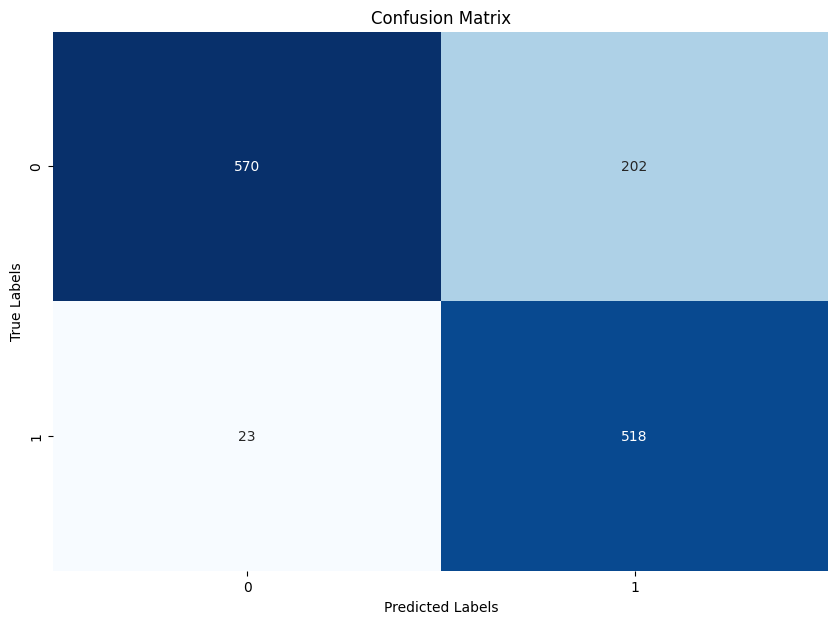

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(pandas_df['label'], pandas_df['prediction'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

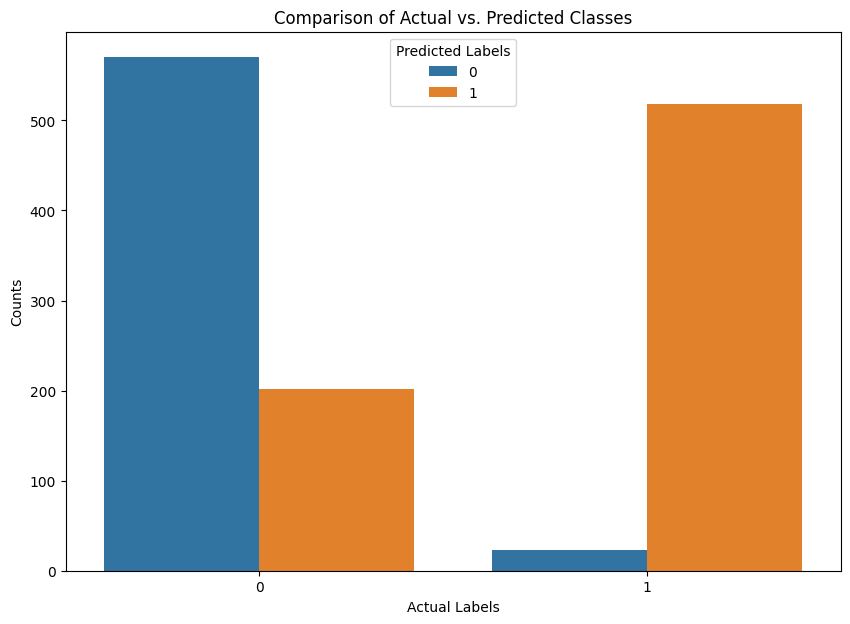

In [ ]:
# Create a dataframe for plotting
plot_df = pandas_df.groupby(['label', 'prediction']).size().reset_index(name='counts')

# Plotting with Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='label', y='counts', hue='prediction', data=plot_df)
plt.title('Comparison of Actual vs. Predicted Classes')
plt.xlabel('Actual Labels')
plt.ylabel('Counts')
plt.legend(title='Predicted Labels')
plt.show()


In [ ]:
###use pyspark bayes
# # Define the Naive Bayes classifier
# nb = NaiveBayes()

# # Set up the pipeline
# pipeline = Pipeline(stages=[assembler, scaler, nb])

# # Train the model
# model = pipeline.fit(train_data)


In [ ]:
# predictions = model.transform(test_data)
# predictions.select("prediction", "label", "features").show(5)

# # Evaluate the model
# evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print(f"Test set accuracy = {accuracy:.2f}")
